In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

17464789/17464789 [==============================] - 0s 0us/step


In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [10]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 20ms/step - loss: 0.6928 - accuracy: 0.5228 - val_loss: 0.6922 - val_accuracy: 0.5430
Epoch 2/100
 17/313 [>.............................] - ETA: 2s - loss: 0.6924 - accuracy: 0.5257

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 4s 12ms/step - loss: 0.6917 - accuracy: 0.5592 - val_loss: 0.6908 - val_accuracy: 0.5696
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6895 - accuracy: 0.6020 - val_loss: 0.6878 - val_accuracy: 0.5970
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6844 - accuracy: 0.6273 - val_loss: 0.6800 - val_accuracy: 0.6398
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6651 - accuracy: 0.6675 - val_loss: 0.6383 - val_accuracy: 0.6888
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5926 - accuracy: 0.7070 - val_loss: 0.5723 - val_accuracy: 0.7222
Epoch 7/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5511 - accuracy: 0.7342 - val_loss: 0.5421 - val_accuracy: 0.7372
Epoch 8/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5227 - accuracy: 0.7575 - val_loss: 0.5167 - val_accuracy: 0.7598
Epoch 9/

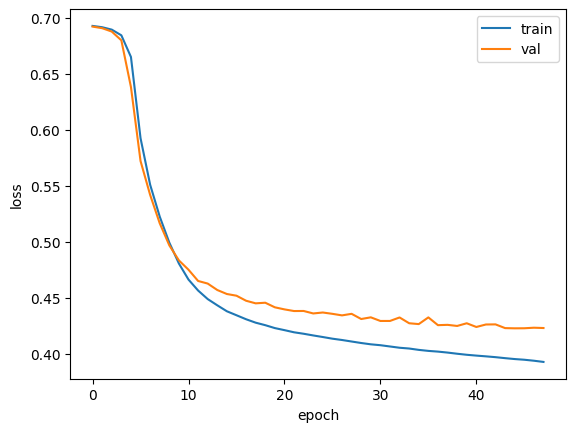

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [14]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [15]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 17ms/step - loss: 0.6926 - accuracy: 0.5286 - val_loss: 0.6920 - val_accuracy: 0.5564
Epoch 2/100
 11/313 [>.............................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5980

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 4s 12ms/step - loss: 0.6904 - accuracy: 0.5863 - val_loss: 0.6892 - val_accuracy: 0.6002
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6855 - accuracy: 0.6240 - val_loss: 0.6819 - val_accuracy: 0.6430
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6690 - accuracy: 0.6722 - val_loss: 0.6500 - val_accuracy: 0.7134
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6200 - accuracy: 0.7038 - val_loss: 0.6034 - val_accuracy: 0.7152
Epoch 6/100
313/313 [==============================] - 4s 11ms/step - loss: 0.5921 - accuracy: 0.7153 - val_loss: 0.5822 - val_accuracy: 0.7216
Epoch 7/100
313/313 [==============================] - 2s 8ms/step - loss: 0.5726 - accuracy: 0.7313 - val_loss: 0.5653 - val_accuracy: 0.7360
Epoch 8/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5549 - accuracy: 0.7459 - val_loss: 0.5457 - val_accuracy: 0.7548
Epoch 9/1

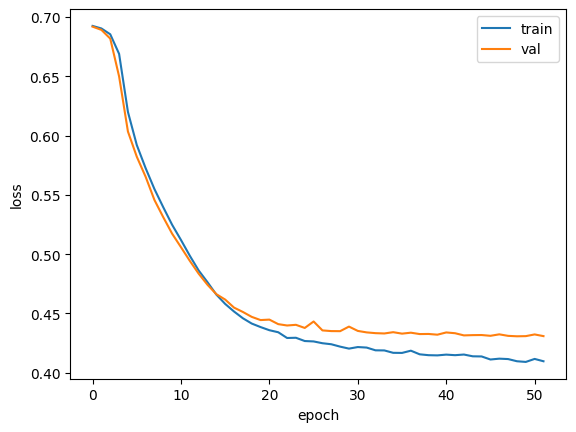

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [17]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [18]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 22ms/step - loss: 0.6928 - accuracy: 0.5220 - val_loss: 0.6924 - val_accuracy: 0.5256
Epoch 2/100
  9/313 [..............................] - ETA: 4s - loss: 0.6926 - accuracy: 0.5122

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 5s 15ms/step - loss: 0.6906 - accuracy: 0.5738 - val_loss: 0.6880 - val_accuracy: 0.6350
Epoch 3/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6689 - accuracy: 0.6554 - val_loss: 0.6276 - val_accuracy: 0.6816
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6007 - accuracy: 0.6937 - val_loss: 0.5746 - val_accuracy: 0.7180
Epoch 5/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5614 - accuracy: 0.7266 - val_loss: 0.5429 - val_accuracy: 0.7420
Epoch 6/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5319 - accuracy: 0.7465 - val_loss: 0.5181 - val_accuracy: 0.7572
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5129 - accuracy: 0.7587 - val_loss: 0.5029 - val_accuracy: 0.7652
Epoch 8/100
313/313 [==============================] - 4s 14ms/step - loss: 0.4992 - accuracy: 0.7693 - val_loss: 0.4894 - val_accuracy: 0.7722
Epoc

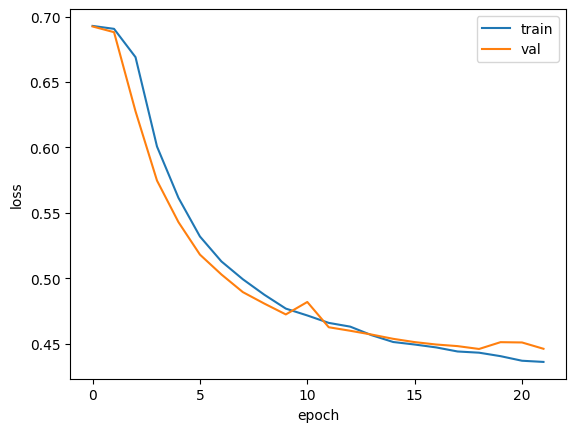

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [21]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [22]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 19ms/step - loss: 0.6927 - accuracy: 0.5286 - val_loss: 0.6924 - val_accuracy: 0.5410
Epoch 2/100
 25/313 [=>............................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5644

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 2s 8ms/step - loss: 0.6917 - accuracy: 0.5677 - val_loss: 0.6913 - val_accuracy: 0.5640
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6903 - accuracy: 0.5814 - val_loss: 0.6898 - val_accuracy: 0.5752
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6881 - accuracy: 0.5921 - val_loss: 0.6874 - val_accuracy: 0.5812
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6850 - accuracy: 0.5983 - val_loss: 0.6839 - val_accuracy: 0.5854
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6803 - accuracy: 0.6043 - val_loss: 0.6787 - val_accuracy: 0.5882
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6732 - accuracy: 0.6176 - val_loss: 0.6709 - val_accuracy: 0.6050
Epoch 8/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6624 - accuracy: 0.6289 - val_loss: 0.6584 - val_accuracy: 0.6202
Epoch 9/10

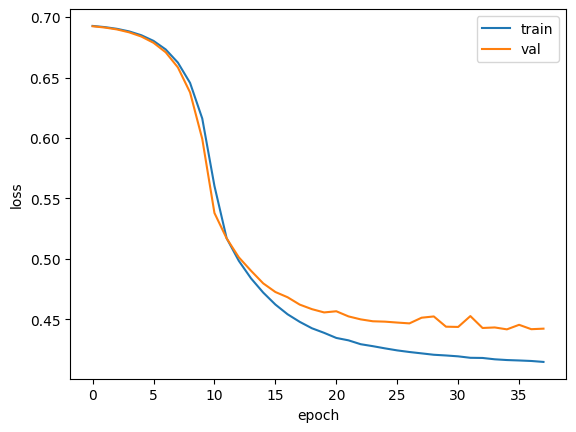

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()